# Task
Predict mobile phone price range (low, medium, high, very high) using the dataset from "/content/dataset.csv", providing an end-to-end beginner-level project with good accuracy.

## Load the data

### Subtask:
Load the dataset from `/content/dataset.csv` into a pandas DataFrame.


**Reasoning**:
Import pandas and load the dataset into a DataFrame, then display the first 5 rows to verify.



In [1]:
import pandas as pd

df = pd.read_csv('/content/dataset.csv')
display(df.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Explore the data

### Subtask:
Perform exploratory data analysis (EDA) to understand the features, their distributions, and relationships with the target variable (`Price_range`). This will include visualizing the data and checking for missing values or outliers.


**Reasoning**:
Display the basic information about the DataFrame, generate descriptive statistics, and check for missing values to understand the data structure and identify potential issues.



In [2]:
df.info()
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


**Reasoning**:
Visualize the distribution of the target variable and the correlation matrix to understand the target variable's distribution and the relationships between features and the target.



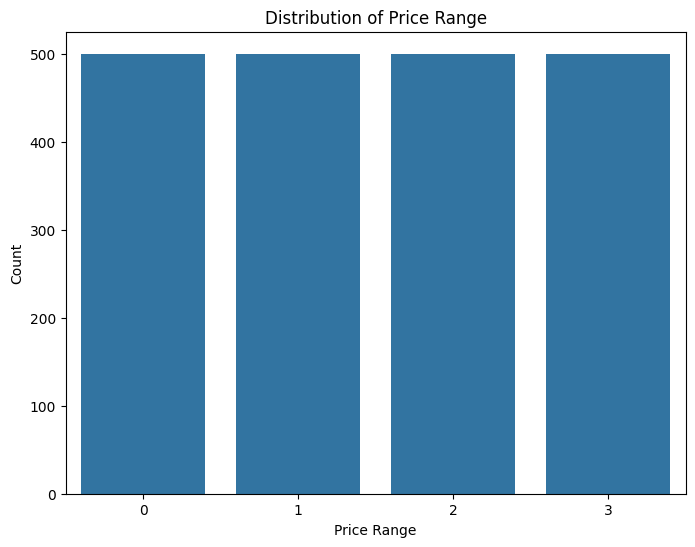

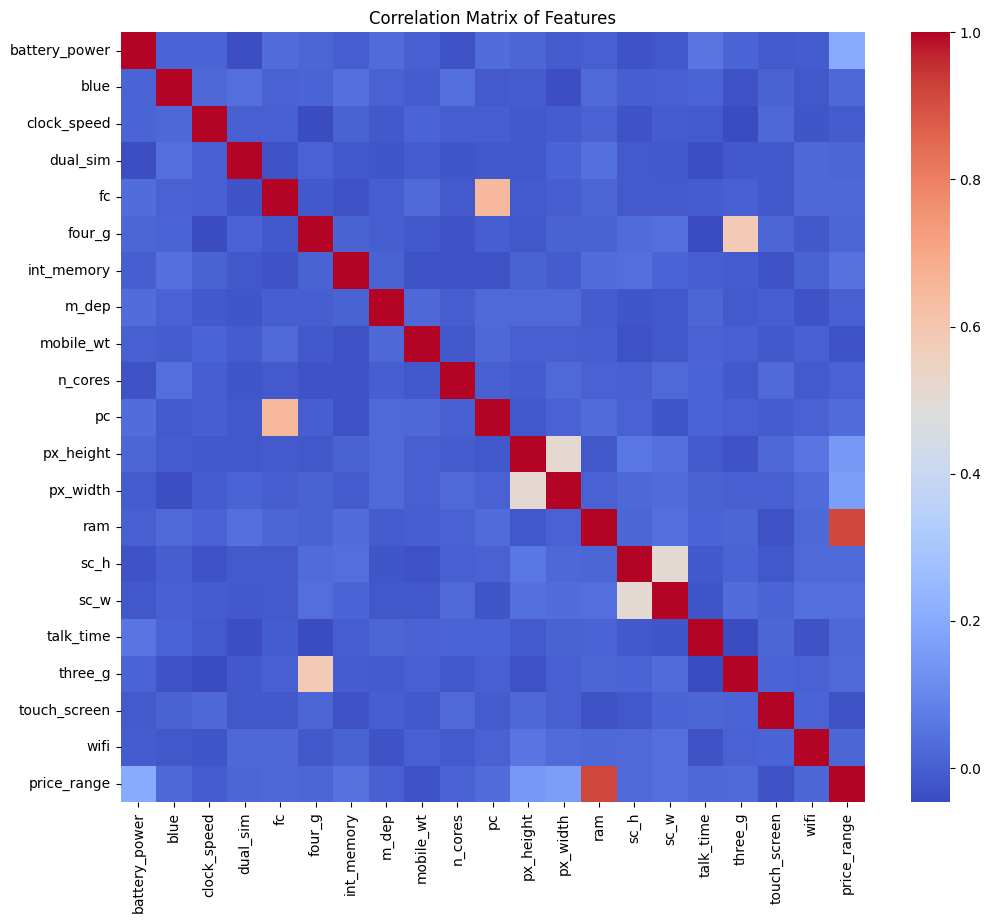

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=df)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

**Reasoning**:
Visualize the relationship between key features and the target variable using appropriate plots to gain deeper insights into how specific features influence the price range. Based on the correlation matrix and general domain knowledge, ram, battery_power, px_height, and px_width are likely important features.



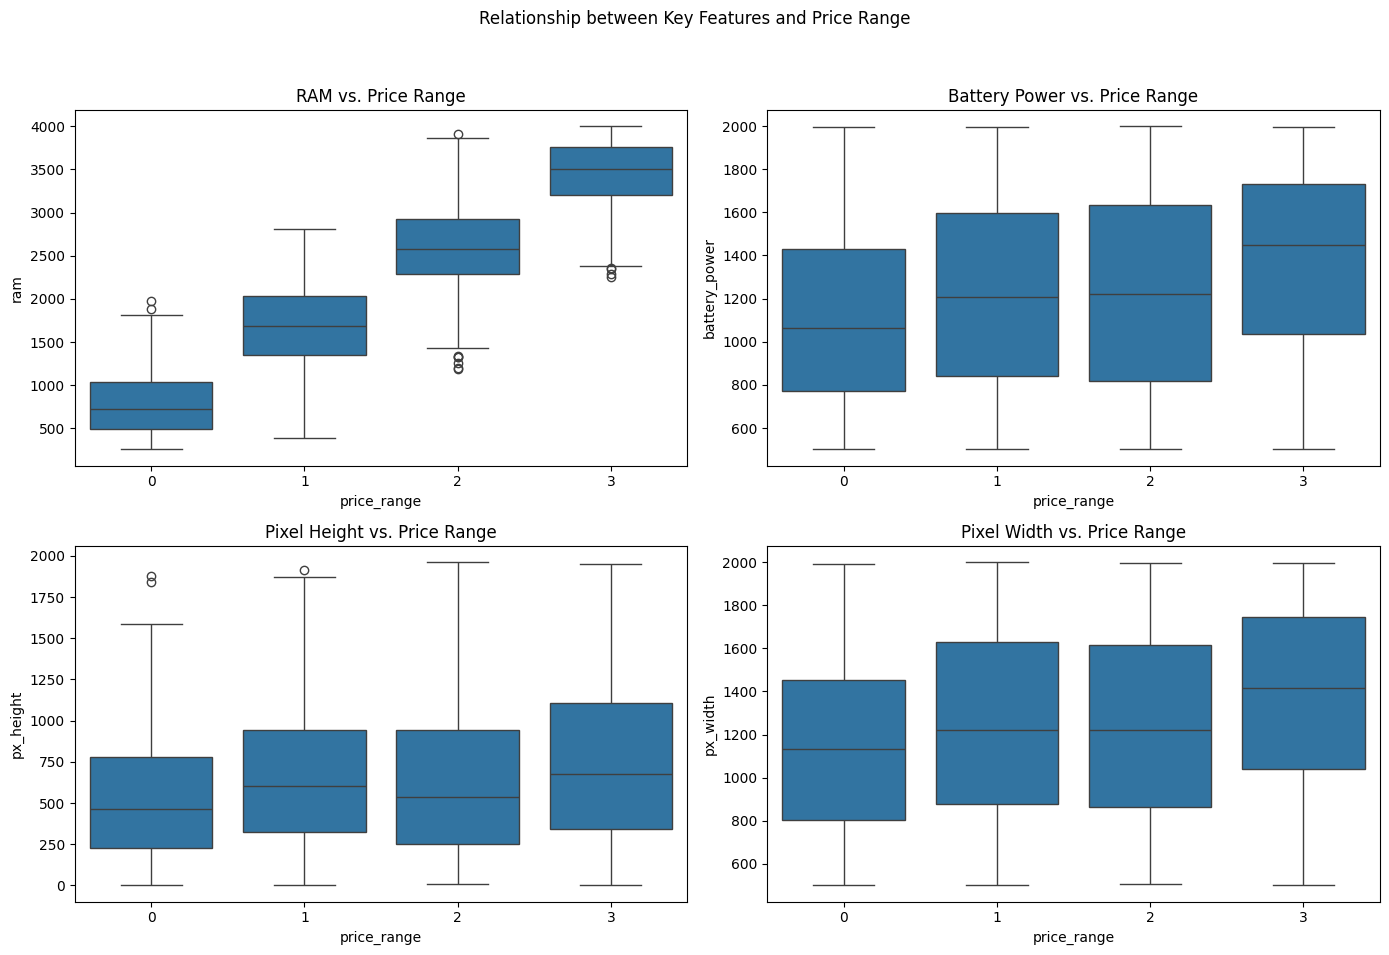

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relationship between Key Features and Price Range')

sns.boxplot(x='price_range', y='ram', data=df, ax=axes[0, 0])
axes[0, 0].set_title('RAM vs. Price Range')

sns.boxplot(x='price_range', y='battery_power', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Battery Power vs. Price Range')

sns.boxplot(x='price_range', y='px_height', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Pixel Height vs. Price Range')

sns.boxplot(x='price_range', y='px_width', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Pixel Width vs. Price Range')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Prepare the data

### Subtask:
Preprocess the data for model training. This may involve handling categorical features, scaling numerical features, and splitting the data into training and testing sets.


**Reasoning**:
Separate features and target, split data, identify numerical features, scale numerical features, and concatenate scaled features for training and testing sets.



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features (X) and target (y)
X = df.drop('price_range', axis=1)
y = df['price_range']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Identify numerical features (all features except the target are numerical in this dataset)
numerical_features = X_train.columns

# 4. Initialize and fit StandardScaler to training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])

# 5. Transform testing data
X_test_scaled = scaler.transform(X_test[numerical_features])

# Convert scaled arrays back to DataFrames (optional but good practice)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

# 6. Concatenate scaled numerical features with any non-numerical features (not applicable here as all are numerical)
# The scaled DataFrames X_train_scaled and X_test_scaled now contain the preprocessed features.
display(X_train_scaled.head())
display(X_test_scaled.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.548360,-0.981423,-1.236230,0.970437,0.620111,-1.046060,0.754832,-0.008935,1.425710,-1.547446,0.020269,0.275712,1.181997,-0.580476,-0.528061,0.759509,-1.445123,0.557137,0.990050,1.002503
240,-1.379535,1.018929,0.837112,-1.030464,-0.993561,0.955968,0.919763,-1.403674,-0.046246,1.510316,-1.476497,-0.258762,-0.556547,1.336453,-0.290196,-1.084869,0.915929,0.557137,0.990050,1.002503
819,-0.010914,-0.981423,-0.748385,0.970437,-0.532512,0.955968,1.359577,-1.403674,1.340790,-1.547446,0.685498,-0.285711,-1.020159,-0.657302,0.423400,1.451150,1.642407,0.557137,-1.010051,1.002503
692,-1.043621,-0.981423,-0.504462,-1.030464,-0.532512,-1.046060,0.315017,-0.357620,1.623858,0.199847,-0.478653,-0.764042,0.984962,1.288322,0.185535,0.528962,-1.081884,-1.794892,-1.010051,1.002503
420,0.488416,1.018929,-1.236230,0.970437,0.620111,-1.046060,-1.389265,-0.357620,-1.008680,0.199847,0.352883,0.401470,-0.336332,-0.489767,-1.479523,-0.162680,1.642407,0.557137,-1.010051,1.002503


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.919657,-0.981423,1.202995,-1.030464,-0.301987,0.955968,-0.399682,0.339750,1.680472,-1.110623,-0.811268,-0.972891,0.831970,-1.323738,-1.003792,0.067867,0.007832,0.557137,0.990050,-0.997503
353,-0.133477,-0.981423,-1.236230,-1.030464,0.620111,0.955968,-1.334288,-0.008935,-0.074553,1.510316,1.018112,-0.829167,-0.609863,0.413624,1.612728,2.603886,1.460787,0.557137,-1.010051,-0.997503
1333,1.659574,-0.981423,1.690840,-1.030464,1.081160,-1.046060,-1.004427,-0.357620,1.567245,1.073493,1.350727,-0.788745,-0.688677,-0.740606,-1.003792,-1.084869,-0.537026,0.557137,0.990050,-0.997503
905,-0.571527,1.018929,0.593189,-1.030464,-0.071463,-1.046060,-0.839496,-1.054989,0.718039,-0.673800,1.517034,-0.871835,0.335906,1.643754,1.374862,0.298414,1.460787,0.557137,0.990050,-0.997503
1289,-1.420389,1.018929,-1.236230,0.970437,0.620111,-1.046060,1.414554,-0.008935,-0.301008,0.199847,-0.312346,0.846117,1.643291,-0.194499,0.423400,-0.162680,-1.081884,0.557137,-1.010051,-0.997503


## Choose and train a model

### Subtask:
Select an appropriate classification model for predicting the price range and train it on the training data.


**Reasoning**:
Import the RandomForestClassifier model and train it on the scaled training data.



In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Calculate and print the evaluation metrics for the trained model on the test set.



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (weighted): {precision:.4f}')
print(f'Recall (weighted): {recall:.4f}')
print(f'F1-score (weighted): {f1:.4f}')

Accuracy: 0.8925
Precision (weighted): 0.8961
Recall (weighted): 0.8925
F1-score (weighted): 0.8933


## Make predictions

### Subtask:
Use the trained model to make predictions on new data.


**Reasoning**:
Use the trained model to make predictions on the scaled test data and display the first few predictions.



In [8]:
# Use the trained model's .predict() method to generate predictions on the scaled test data (X_test_scaled).
y_pred = model.predict(X_test_scaled)

# Display the first few predictions to verify the output format.
print("First few predictions:")
print(y_pred[:10])

First few predictions:
[0 2 1 3 1 2 2 0 3 1]


## Summary:

### Data Analysis Key Findings

*   The dataset contains 2000 entries with 21 features, including the target variable `price_range`.
*   There are no missing values in the dataset.
*   The target variable `price_range` is evenly distributed across its four categories (0, 1, 2, 3).
*   The feature `ram` shows the strongest positive correlation with `price_range`, followed by `battery_power`, `px_height`, and `px_width`.
*   Features like `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, and `wifi` have very low correlation with the price range.
*   The data was successfully split into training (80%) and testing (20%) sets and numerical features were scaled using `StandardScaler`.
*   A `RandomForestClassifier` model was trained on the scaled training data.
*   The trained model achieved an accuracy of 0.8925, a weighted precision of 0.8961, a weighted recall of 0.8925, and a weighted F1-score of 0.8933 on the test set.

### Insights or Next Steps

*   The strong correlation between `ram` and `price_range` suggests that RAM is a dominant factor in determining mobile phone price.
*   Further model tuning or exploration of other classification algorithms could potentially improve the prediction accuracy.
